##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5

サンプルデータから得られる平均と標準偏差を元にして得られる正規分布の曲線（最尤推定にて演繹的に得られる曲線）と、サンプルデータのヒストグラムとの一致を確認する過程。<br>
```os.path.dirname(os.path.abspath(__file__))```<br>
はローカル実行環境ではエラーとなるので、<br>
```os.getcwd()```<br>
に修正した（オリジナルコードは```#=#```でコメントアウトしている）<br>
なお、ファイルの場所が同じフォルダ内なら、```os.path.join```も不要で、直接```plt.imread(file_path)```の```file_path```にファイル名（```'flower.png'```）を入れるだけで良い。<br>
【注意】オリジナルコードとして同梱されている「notebooks」フォルダ内のコードは直接ファイル名を扱っているので、動作に問題は生じない<br>

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

In [18]:
x = torch.randn(3, 64, 64)
T = 1000
betas = torch.linspace(0.0001, 0.02, T)

In [19]:
for t in range(T):
    beta = betas[t]
    eps = torch.randn_like(x)
    x = torch.sqrt(1 - beta) * x + torch.sqrt(beta) * eps

In [20]:
# load image
#=# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'flower.png')
image = plt.imread(file_path)
print(image.shape)  # (64, 64, 3)

(64, 64, 3)


In [21]:
# preprocess
preprocess = transforms.ToTensor()
x = preprocess(image)
print(x.shape)  # (3, 64, 64)

torch.Size([3, 64, 64])


In [22]:
original_x = x.clone()  # keep original image

In [23]:
def reverse_to_img(x):
    x = x * 255
    x = x.clamp(0, 255)
    x = x.to(torch.uint8)
    to_pil = transforms.ToPILImage()
    return to_pil(x)

In [24]:
T = 1000
beta_start = 0.0001
beta_end = 0.02
betas = torch.linspace(beta_start, beta_end, T)
imgs = []

In [25]:
for t in range(T):
    if t % 100 == 0:
        img = reverse_to_img(x)
        imgs.append(img)

    beta = betas[t]
    eps = torch.randn_like(x)
    x = torch.sqrt(1 - beta) * x + torch.sqrt(beta) * eps

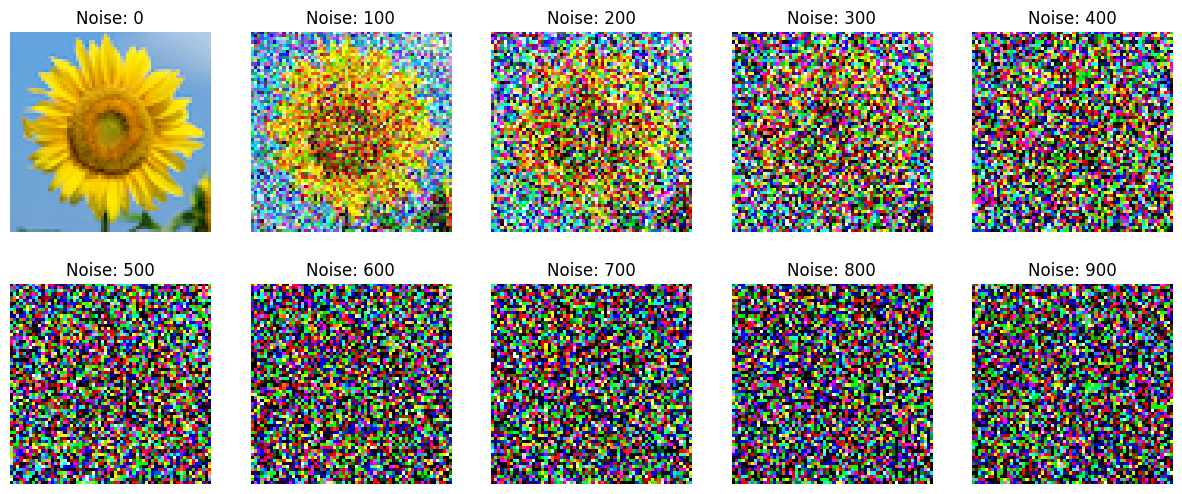

In [26]:
# show imgs
plt.figure(figsize=(15, 6))
for i, img in enumerate(imgs[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Noise: {i * 100}')
    plt.axis('off')
plt.show()

In [27]:
# ============================================
# q(x_t|x_0)
# ============================================
def add_noise(x_0, t, betas):
    T = len(betas)
    assert t >= 1 and t <= T
    t_idx = t - 1  # betas[0] is for t=1

    alphas = 1 - betas
    alpha_bars = torch.cumprod(alphas, dim=0)
    alpha_bar = alpha_bars[t_idx]

    eps = torch.randn_like(x_0)
    x_t = torch.sqrt(alpha_bar) * x_0 + torch.sqrt(1 - alpha_bar) * eps
    return x_t

In [28]:
x = original_x

In [29]:
t = 100
x_t = add_noise(x, t, betas)

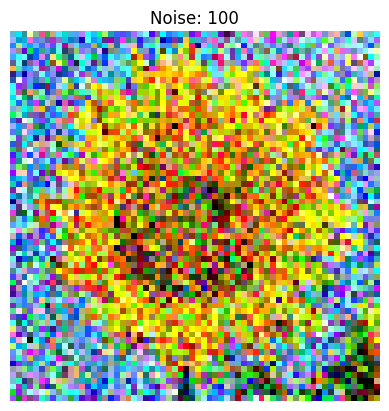

In [30]:
img = reverse_to_img(x_t)
plt.imshow(img)
plt.title(f'Noise: {t}')
plt.axis('off')
plt.show()